## Customer Segmentation with PCA and Clustering

### Introduction:<br>
Customer segmentation is a powerful technique used in marketing and customer analytics to divide customers into groups based on their shared characteristics and behaviors. By segmenting customers, businesses can gain valuable insights to tailor their marketing strategies, improve customer satisfaction, and optimize their business operations. In this notebook, we will explore how to perform customer segmentation using PCA and clustering algorithms.

By following this notebook, you will gain a solid understanding of how to perform customer segmentation using PCA and clustering techniques. This approach will help you uncover valuable customer segments and drive data-driven decision-making in your business.

In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# StandardScaler from Scikit-Learn
from sklearn.preprocessing import StandardScaler

# PCA from Scikit-Learn
from sklearn.decomposition import PCA

# Scikit-Learn's KMeans algorithm
from sklearn.cluster import KMeans

# Adjusted Rand index
from sklearn.metrics import adjusted_rand_score

In [7]:
# Load international online transactions data from CSV
df = pd.read_csv('Online Retail.csv', encoding='latin-1')

In [8]:
#Dataframe dimension
df.shape

(541909, 8)

In [9]:
# First 10 rows of data
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom


<AxesSubplot:xlabel='count', ylabel='Country'>

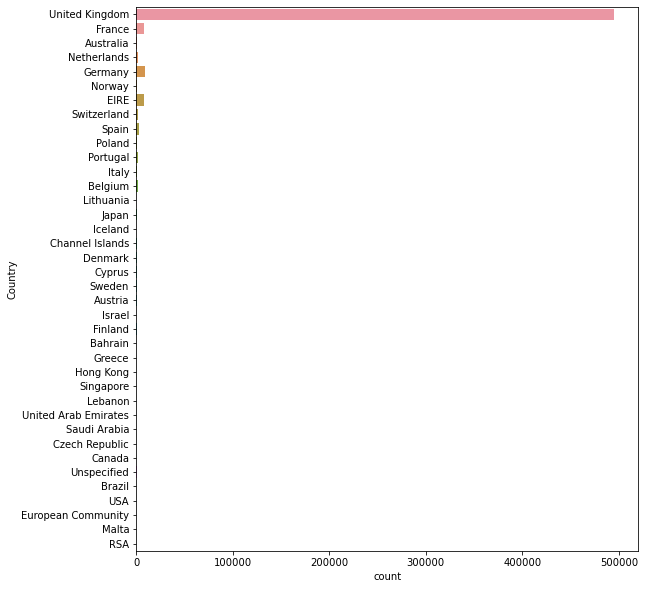

In [10]:
# Make figsize
plt.figure(figsize=(9,10))

# Bar plot by country
sns.countplot(y='Country', data=df)

In [11]:
# Missing data by feature
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
# Only keep transactions with CustomerID's
df = df[df.CustomerID.notnull()]

In [13]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
# Convert customer ID's into integers
df['CustomerID'] = df.CustomerID.astype(int)

# Display first 5 CustomerID's in the transaction dataset
df.CustomerID.head()

0    17850
1    17850
2    17850
3    17850
4    17850
Name: CustomerID, dtype: int32

In [15]:
# Create 'Sales' interaction feature
df['Sales'] = df.Quantity * df.UnitPrice

# Display first 5 Sales values in the transaction dataset
df.Sales.head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: Sales, dtype: float64

In [17]:
# Aggregate invoice data
invoice_data = df.groupby('CustomerID').agg(total_transactions=('InvoiceNo', 'nunique'))

# Display invoice data for the first 5 customers
invoice_data.head()

,total_transactions
CustomerID,
12346,2
12347,7
12348,4
12349,1
12350,1


In [19]:
# Aggregate product data
product_data = df.groupby('CustomerID').agg(total_products=('StockCode', 'count'),
                                           total_unique_products=('StockCode', 'nunique'))

# Display product data for the first 5 customers
product_data.head()


,total_products,total_unique_products
CustomerID,,
12346,2,1
12347,182,103
12348,31,22
12349,73,73
12350,17,17


In [20]:
# Roll up sales data
sales_data = df.groupby('CustomerID').agg(total_sales=('Sales', 'sum'),
                                          avg_product_value=('Sales', 'mean'))

# Display sales data for the first 5 customers
sales_data.head()


,total_sales,avg_product_value
CustomerID,,
12346,0.00,0.000000
12347,4310.00,23.681319
12348,1797.24,57.975484
12349,1757.55,24.076027
12350,334.40,19.670588


In [21]:
# Aggregate cart-level data (i.e. invoice-level)
cart_data = df.groupby(['CustomerID', 'InvoiceNo']).agg(cart_value=('Sales', 'sum'))

# Display cart data for the first 20 carts
cart_data.head(20)


cart_value
CustomerID InvoiceNo            
12346      541431       77183.60
           C541433     -77183.60
12347      537626         711.79
           542237         475.39
           549222         636.25
           556201         382.52
           562032         584.91
           573511        1294.32
           581180         224.82
12348      539318         892.80
           541998         227.44
           548955         367.00
           568172         310.00
12349      577609        1757.55
12350      543037         334.40
12352      544156         296.50
           545323         144.35
           545332         840.30
           546869         120.33
           547390         160.33

In [22]:
# Reset index
cart_data.reset_index(inplace=True)

# Display cart data for first 10 CARTS
cart_data.head(10)

,CustomerID,InvoiceNo,cart_value
0,12346,541431,77183.60
1,12346,C541433,-77183.60
2,12347,537626,711.79
3,12347,542237,475.39
4,12347,549222,636.25
5,12347,556201,382.52
6,12347,562032,584.91
7,12347,573511,1294.32
8,12347,581180,224.82
9,12348,539318,892.80


In [23]:
# Aggregate cart data (at customer-level)
agg_cart_data = cart_data.groupby('CustomerID').agg(avg_cart_value=('cart_value', 'mean'),
                                                   min_cart_value=('cart_value', 'min'),
                                                   max_cart_value=('cart_value', 'max'))

# Display cart data for the first 5 customers
agg_cart_data.head()


,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,
12346,0.000000,-77183.60,77183.60
12347,615.714286,224.82,1294.32
12348,449.310000,227.44,892.80
12349,1757.550000,1757.55,1757.55
12350,334.400000,334.40,334.40


In [24]:
# Join together customer-level data
customer_df = invoice_data.join([product_data, sales_data, agg_cart_data])

# Display customer-level data for first 5 customers
customer_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12346,2,2,1,0.00,0.000000,0.000000,-77183.60,77183.60
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40


In [45]:
# Save analytical base table
customer_df.to_csv('C:/Users/divya/ML/Customer-Segmentation/analytical_base_table.csv')

In [25]:
# Get item_dummies - creates the vector of StockCode
item_dummies = pd.get_dummies(df.StockCode)

item_dummies.head()

,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,15030,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16010,16011,16012,16014,16015,16016,16020C,16033,16043,16045,16046,16048,16049,16052,16054,16151A,16156L,16156S,16161G,16161M,16161P,16161U,16162L,16162M,...,90202D,90204,90205A,90205C,90206A,90206C,90208,90209A,90209B,90209C,90210A,90210B,90210C,90210D,90211A,90211B,90212B,90212C,90214A,90214B,90214C,90214D,90214E,90214F,90214G,90214H,90214I,90214J,90214K,90214L,90214M,90214N,90214O,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
# Add CustomerID to item_dummies
item_dummies['CustomerID'] = df.CustomerID

# Display first 5 rows of item_dummies
item_dummies.head()

,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,15030,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16010,16011,16012,16014,16015,16016,16020C,16033,16043,16045,16046,16048,16049,16052,16054,16151A,16156L,16156S,16161G,16161M,16161P,16161U,16162L,16162M,...,90204,90205A,90205C,90206A,90206C,90208,90209A,90209B,90209C,90210A,90210B,90210C,90210D,90211A,90211B,90212B,90212C,90214A,90214B,90214C,90214D,90214E,90214F,90214G,90214H,90214I,90214J,90214K,90214L,90214M,90214N,90214O,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST,CustomerID
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17850
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17850
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17850
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17850
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17850


In [27]:
# Create item_data by aggregating at customer level
item_data = item_dummies.groupby('CustomerID').sum()

# Display first 5 rows of item_data
item_data.head()

,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,15030,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16010,16011,16012,16014,16015,16016,16020C,16033,16043,16045,16046,16048,16049,16052,16054,16151A,16156L,16156S,16161G,16161M,16161P,16161U,16162L,16162M,...,90202D,90204,90205A,90205C,90206A,90206C,90208,90209A,90209B,90209C,90210A,90210B,90210C,90210D,90211A,90211B,90212B,90212C,90214A,90214B,90214C,90214D,90214E,90214F,90214G,90214H,90214I,90214J,90214K,90214L,90214M,90214N,90214O,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12346,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [28]:
# Total times each item was purchased
item_data.sum()

10002       49
10080       21
10120       30
10123C       3
10124A       5
          ... 
D           77
DOT         16
M          465
PADS         4
POST      1196
Length: 3684, dtype: int64

In [29]:
# Save item_data.csv
item_data.to_csv('C:/Users/divya/ML/Customer-Segmentation/item_data.csv')

In [30]:
# Display most popular 20 items
item_data.sum().sort_values().tail(120)

22114      524
22621      525
48138      527
22969      527
21914      529
          ... 
47566     1416
84879     1418
85099B    1662
22423     1905
85123A    2077
Length: 120, dtype: int64

In [31]:
# Get list of StockCodes for the 20 most popular items
top_20_items = item_data.sum().sort_values().tail(120).index

top_20_items

Index(['22114', '22621', '48138', '22969', '21914', '79321', '23307', '84992',
       '84378', '23322',
       ...
       '22197', '20727', 'POST', '22720', '20725', '47566', '84879', '85099B',
       '22423', '85123A'],
      dtype='object', length=120)

In [32]:
# Keep only features for top 20 items
top_20_item_data = item_data[top_20_items]

# Shape of remaining dataframe
top_20_item_data.shape

(4372, 120)

In [33]:
top_20_item_data.head()

,22114,22621,48138,22969,21914,79321,23307,84992,84378,23322,48187,22556,22113,21731,22659,84755,20972,20719,21485,21928,82483,21975,22907,22966,21915,22090,21755,20685,82486,85152,22551,22865,23321,23344,22554,22355,84978,22467,82484,21929,22698,23208,22662,21166,22326,22728,22624,22630,21232,23300,...,21080,22077,22697,23245,20724,23201,23301,23202,21931,22411,20914,22726,22470,82494L,22139,22178,22699,23084,20726,22961,22666,22138,22993,22386,82482,23206,22727,21034,22960,22384,22469,22457,20728,22382,22086,23298,23209,21212,22383,23203,22197,20727,POST,22720,20725,47566,84879,85099B,22423,85123A
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12346,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12347,0,1,0,0,0,0,0,3,0,0,0,0,0,5,0,0,0,4,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,2,3,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0
12348,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0
12349,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
12350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [48]:
# Save threshold_item_data.csv
top_20_item_data.to_csv('C:/Users/divya/ML/Customer-Segmentation/threshold_item_data.csv')

In [35]:
# Read item_data.csv
item_data = pd.read_csv('C:/Users/divya/ML/Customer-Segmentation/item_data.csv', index_col=0)

In [36]:
# Display item_data's shape
item_data.shape

(4372, 3684)

In [37]:
# Initialize instance of StandardScaler
scaler = StandardScaler()

# Fit and transform item_data
item_data_scaled = scaler.fit_transform(item_data)

# Display first 5 rows of item_data_scaled
item_data_scaled[:5]

array([[-0.08588578, -0.06364835, -0.06856037, ..., -0.16229977,
        -0.03026138, -0.18873641],
       [-0.08588578, -0.06364835, -0.06856037, ..., -0.16229977,
        -0.03026138, -0.18873641],
       [-0.08588578, -0.06364835, -0.06856037, ..., -0.16229977,
        -0.03026138,  2.57098131],
       [-0.08588578, -0.06364835, -0.06856037, ..., -0.16229977,
        -0.03026138,  0.50119302],
       [-0.08588578, -0.06364835, -0.06856037, ..., -0.16229977,
        -0.03026138,  0.50119302]])

In [38]:
# Initialize and fit a PCA transformation
pca = PCA()
pca.fit(item_data_scaled)

PCA()

In [39]:
# Generate new features
PC_items = pca.transform(item_data_scaled)

# Display first 5 rows
PC_items[:5]

array([[-5.19548892e+00,  1.39061399e+00,  5.32892806e-01, ...,
        -4.51895465e-16, -5.85816118e-15,  4.61436445e-16],
       [ 6.61858395e+00, -7.54851260e-01, -2.15820936e+00, ...,
         9.22439208e-15, -1.73073361e-14,  4.86763407e-15],
       [-3.69030274e+00,  5.49135103e-01,  5.47101613e-01, ...,
        -1.68615122e-15,  1.60288449e-15, -2.56739074e-15],
       [-1.47833783e+00, -7.57377696e-01, -3.29650230e-01, ...,
         2.32539682e-15, -2.67737221e-14,  1.13017234e-15],
       [-4.11967209e+00,  8.30026598e-01,  1.49653746e+00, ...,
         2.32019265e-15,  2.07247414e-14, -5.46004214e-15]])

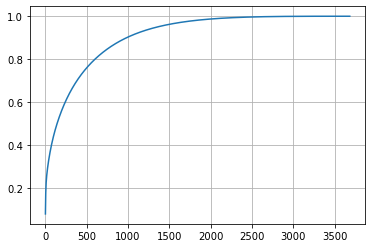

In [40]:
# Cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.grid()
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)

In [41]:
# How much variance we'd capture with the first 125 components
cumulative_explained_variance[300]

0.6475776833426306

In [42]:
pca = PCA(n_components=300)

# Fit and transform item_data_scaled
PC_items = pca.fit_transform(item_data_scaled)

# Display shape of PC_items
PC_items.shape

(4372, 300)

In [43]:
# Put PC_items into a dataframe
items_pca = pd.DataFrame(PC_items)

# Name the columns
items_pca.columns = ['PC{}'.format(i + 1) for i in range(PC_items.shape[1])]

# Update its index
items_pca.index = item_data.index

# Display first 5 rows
items_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,...,PC251,PC252,PC253,PC254,PC255,PC256,PC257,PC258,PC259,PC260,PC261,PC262,PC263,PC264,PC265,PC266,PC267,PC268,PC269,PC270,PC271,PC272,PC273,PC274,PC275,PC276,PC277,PC278,PC279,PC280,PC281,PC282,PC283,PC284,PC285,PC286,PC287,PC288,PC289,PC290,PC291,PC292,PC293,PC294,PC295,PC296,PC297,PC298,PC299,PC300
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12346,-5.195489,1.390614,0.532893,-0.873663,-0.963683,-1.082128,0.151875,1.815381,-0.497267,-0.311271,-0.644475,-0.285216,-0.385781,0.669581,-0.119632,0.503635,0.152975,-0.065700,0.197270,-0.104098,-0.143949,0.352162,0.201110,0.184868,-0.000614,-0.127357,0.216959,0.055910,-0.111683,0.207824,0.002664,0.170892,0.046579,0.087164,-0.081891,0.028160,0.234588,-0.071001,0.158801,0.056698,0.122161,-0.129798,0.138780,-0.128930,-0.015230,-0.212058,-0.027296,0.185874,0.090223,-0.090612,...,-0.082353,-0.176670,-0.066529,-0.009953,-0.109069,0.016980,-0.039472,0.104126,0.013227,-0.023436,-0.084383,-0.019827,0.038658,0.167479,0.172806,0.053969,0.050762,0.064937,-0.026356,0.077964,0.031157,-0.045225,-0.053809,0.019667,-0.021711,-0.049485,0.001595,-0.066630,0.000938,0.127801,0.086314,-0.038004,-0.004440,0.006080,-0.156054,-0.058217,-0.053115,0.106922,-0.118066,0.015424,0.032176,0.020395,-0.031062,0.028537,0.061032,0.133627,0.108941,0.045096,0.119845,0.112550
12347,6.618584,-0.754851,-2.158209,1.549619,-0.499597,0.454830,-1.751530,2.078026,-4.059626,0.036426,-0.433320,-3.953807,-3.375005,-0.220887,0.847140,-3.442354,-2.700633,1.444105,0.788827,-2.107358,-1.629380,-6.837057,5.451042,-1.627767,4.475996,-0.292137,3.019823,-1.278426,4.389021,1.449134,-3.524526,-1.243026,0.838809,-1.376099,-1.816384,-4.074809,-1.701749,0.324217,2.899070,1.370754,-2.691004,-2.972420,-1.077738,1.965443,-1.919788,2.236906,1.293847,-3.836194,-0.526431,4.007438,...,0.628907,-0.997478,-1.871232,-5.173085,5.080361,-5.340177,-7.011018,-1.639613,-8.817714,0.800235,7.859488,-1.584938,-1.998098,1.858609,-0.467521,-3.994857,0.406855,1.231541,-6.282847,0.471158,-2.385882,3.405001,3.324645,-6.261825,3.041360,0.519454,0.202352,-1.493749,0.391125,2.237509,-3.479413,-3.281213,5.580851,0.667562,6.389599,-1.707764,6.100693,2.008320,-1.130762,4.820149,-3.341031,-1.359906,-5.355640,-2.649449,-1.156305,4.370764,-2.124537,-5.353035,-3.913934,-0.107857
12348,-3.690303,0.549135,0.547102,0.213654,0.477261,-1.177566,-0.387883,1.114326,-1.340736,-0.641822,-1.578440,-0.437394,-0.655197,2.002496,1.585451,0.027563,-0.194498,-0.811521,-0.708708,0.193131,-0.645834,-0.358455,-1.024523,0.022736,-0.448985,0.722462,1.047894,0.423403,-0.798731,0.760989,0.976845,-0.640353,0.785637,0.489910,0.634078,-0.175041,0.030149,0.755318,-0.854960,0.955609,1.224258,0.396406,0.571808,0.254549,-0.284892,-0.665805,0.184677,0.478877,-0.008873,-0.690146,...,0.017378,0.260584,-0.149908,0.296972,0.038091,0.095304,0.630506,-0.041505,0.295038,-0.005225,0.585742,-0.125762,0.722873,0.377091,-0.253891,0.454470,0.737053,-0.533975,-0.795200,-0.146995,-0.206137,0.574306,0.155928,-0.728216,0.175732,-0.661939,0.340957,0.408590,0.525924,-0.007223,-0.359603,0.556859,-0.246841,-0.641554,0.741931,0.147678,-0.225157,0.150923,-0.592054,0.335188,0.278000,0.390927,-0.004632,0.124870,-0.064061,0.564912,-0.180328,0.271295,0.393790,-0.228390
12349,-1.478338,-0.757378,-0.329650,-0.909495,-0.653472,-0.247580,-0.865896,-0.338826,-0.876192,-0.080146,0.994721,-0.732439,-1.913715,1.738443,-0.542900,-0.866573,1.966130,0.079099,0.996621,-0.439664,-1.056094,-0.103218,-0.392054,0.189446,0.017635,-0.149982,-0.396261,0.182258,-0.140889,-1.518847,1.132358,0.101935,-0.179061,0.611336,0.645117,0.753772,-0.005446,0.355388,0.533386,0.219703,0.243229,-0.620123,-0.810548,0.449836,-0.474980,0.342148,-0.950437,0.109670

In [44]:
# Save pca_item_data.csv
items_pca.to_csv('C:/Users/divya/ML/Customer-Segmentation/pca_item_data.csv')

In [50]:
# Import analytical base table
base_df = pd.read_csv('C:/Users/divya/ML/Customer-Segmentation/analytical_base_table.csv', index_col=0)

# Import thresholded item features
threshold_item_data = pd.read_csv('C:/Users/divya/ML/Customer-Segmentation/threshold_item_data.csv', index_col=0)

# Import PCA item features
pca_item_data = pd.read_csv('C:/Users/divya/ML/Customer-Segmentation/pca_item_data.csv', index_col=0)

In [51]:
# Print shape of each dataframe
print( base_df.shape )
print( threshold_item_data.shape )
print( pca_item_data.shape )

(4372, 8)
(4372, 120)
(4372, 300)


In [52]:
# Join base_df with threshold_item_data
threshold_df = base_df.join(threshold_item_data)

# Display first 5 rows of threshold_df
threshold_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,22114,22621,48138,22969,21914,79321,23307,84992,84378,23322,48187,22556,22113,21731,22659,84755,20972,20719,21485,21928,82483,21975,22907,22966,21915,22090,21755,20685,82486,85152,22551,22865,23321,23344,22554,22355,84978,22467,82484,21929,22698,23208,...,21080,22077,22697,23245,20724,23201,23301,23202,21931,22411,20914,22726,22470,82494L,22139,22178,22699,23084,20726,22961,22666,22138,22993,22386,82482,23206,22727,21034,22960,22384,22469,22457,20728,22382,22086,23298,23209,21212,22383,23203,22197,20727,POST,22720,20725,47566,84879,85099B,22423,85123A
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12346,2,2,1,0.00,0.000000,0.000000,-77183.60,77183.60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,0,1,0,0,0,0,0,3,0,0,0,0,0,5,0,0,0,4,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,2,3,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [53]:
# Join base_df with pca_item_data
pca_df = base_df.join(pca_item_data)

# Display first 5 rows of pca_df
pca_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,...,PC251,PC252,PC253,PC254,PC255,PC256,PC257,PC258,PC259,PC260,PC261,PC262,PC263,PC264,PC265,PC266,PC267,PC268,PC269,PC270,PC271,PC272,PC273,PC274,PC275,PC276,PC277,PC278,PC279,PC280,PC281,PC282,PC283,PC284,PC285,PC286,PC287,PC288,PC289,PC290,PC291,PC292,PC293,PC294,PC295,PC296,PC297,PC298,PC299,PC300
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12346,2,2,1,0.00,0.000000,0.000000,-77183.60,77183.60,-5.195489,1.390614,0.532893,-0.873663,-0.963683,-1.082128,0.151875,1.815381,-0.497267,-0.311271,-0.644475,-0.285216,-0.385781,0.669581,-0.119632,0.503635,0.152975,-0.065700,0.197270,-0.104098,-0.143949,0.352162,0.201110,0.184868,-0.000614,-0.127357,0.216959,0.055910,-0.111683,0.207824,0.002664,0.170892,0.046579,0.087164,-0.081891,0.028160,0.234588,-0.071001,0.158801,0.056698,0.122161,-0.129798,...,-0.082353,-0.176670,-0.066529,-0.009953,-0.109069,0.016980,-0.039472,0.104126,0.013227,-0.023436,-0.084383,-0.019827,0.038658,0.167479,0.172806,0.053969,0.050762,0.064937,-0.026356,0.077964,0.031157,-0.045225,-0.053809,0.019667,-0.021711,-0.049485,0.001595,-0.066630,0.000938,0.127801,0.086314,-0.038004,-0.004440,0.006080,-0.156054,-0.058217,-0.053115,0.106922,-0.118066,0.015424,0.032176,0.020395,-0.031062,0.028537,0.061032,0.133627,0.108941,0.045096,0.119845,0.112550
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,6.618584,-0.754851,-2.158209,1.549619,-0.499597,0.454830,-1.751530,2.078026,-4.059626,0.036426,-0.433320,-3.953807,-3.375005,-0.220887,0.847140,-3.442354,-2.700633,1.444105,0.788827,-2.107358,-1.629380,-6.837057,5.451042,-1.627767,4.475996,-0.292137,3.019823,-1.278426,4.389021,1.449134,-3.524526,-1.243026,0.838809,-1.376099,-1.816384,-4.074809,-1.701749,0.324217,2.899070,1.370754,-2.691004,-2.972420,...,0.628907,-0.997478,-1.871232,-5.173085,5.080361,-5.340177,-7.011018,-1.639613,-8.817714,0.800235,7.859488,-1.584938,-1.998098,1.858609,-0.467521,-3.994857,0.406855,1.231541,-6.282847,0.471158,-2.385882,3.405001,3.324645,-6.261825,3.041360,0.519454,0.202352,-1.493749,0.391125,2.237509,-3.479413,-3.281213,5.580851,0.667562,6.389599,-1.707764,6.100693,2.008320,-1.130762,4.820149,-3.341031,-1.359906,-5.355640,-2.649449,-1.156305,4.370764,-2.124537,-5.353035,-3.913934,-0.107857
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,-3.690303,0.549135,0.547102,0.213654,0.477261,-1.177566,-0.387883,1.114326,-1.340736,-0.641822,-1.578440,-0.437394,-0.655197,2.002496,1.585451,0.027563,-0.194498,-0.811521,-0.708708,0.193131,-0.645834,-0.358455,-1.024523,0.022736,-0.448985,0.722462,1.047894,0.423403,-0.798731,0.760989,0.976845,-0.640353,0.785637,0.489910,0.634078,-0.175041,0.030149,0.755318,-0.854960,0.955609,1.224258,0.396406,...,0.017378,0.260584,-0.149908,0.296972,0.038091,0.095304,0.630506,-0.041505,0.295038,-0.005225,0.585742,-0.125762,0.722873,0.377091,-0.253891,0.454470,0.737053,-0.533975,-0.795200,-0.146995,-0.206137,0.574306,0.155928,-0.728216,0.175732,-0.661939,0.340957,0.408590,0.525924,-0.007223,-0.359603,0.556859,-0.246841,-0.641554,0.741931,0.147678,-0.225157,0.150923,-0.592054,0.335188,0.278000,0.390927,-0.004632,0.124870,-0.064061,0.564912,-0.180328,0.271295,0.393790,-0.228390
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,-1.478338,-0.757378,-0.329650,-0.909495,-0.653472,-0.247580,-0.865896,-0.338826,-0.876192,-0.080146,0.994721,-0.732439,-1.913715,1.738443,-0.542900,-0.866573,1.966130,0.079099,0.996621,-0.439664,-1.056094,-0.103218,-0.392054,0.189446,0.017635,-0.149982,-0.396261,0.182258,-0.140889,-1.518847,1.132358,0.101935,-0.179061,0.611336,0.645117,0.753772,-0.005446,0.355388,0.533386,0.219703,0.2432

In [54]:
# Initialize instance of StandardScaler
t_scaler = StandardScaler()
p_scaler = StandardScaler()

# Fit and transform
threshold_df_scaled = t_scaler.fit_transform(threshold_df)
pca_df_scaled = p_scaler.fit_transform(pca_df)

In [55]:
t_kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 123)

In [56]:
t_kmeans.fit(threshold_df_scaled)
threshold_df['cluster'] = t_kmeans.fit_predict(threshold_df_scaled)

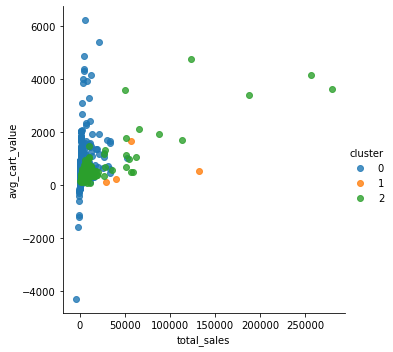

In [57]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=threshold_df, fit_reg=False)

In [58]:
p_kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 123)

In [59]:
p_kmeans.fit(pca_df_scaled)
pca_df['cluster'] = p_kmeans.fit_predict(pca_df_scaled)

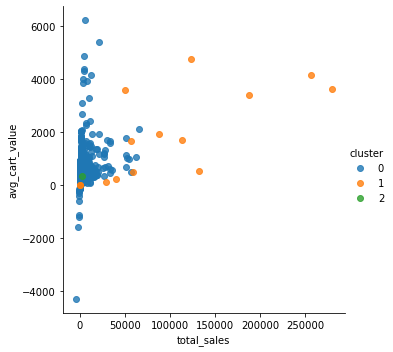

In [60]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=pca_df, fit_reg=False)

In [61]:
# Similary between base_df.cluster and threshold_df.cluster
adjusted_rand_score(pca_df.cluster, threshold_df.cluster)

0.11425162157285614